In [2]:
from Prior import PPI_prior
from PartialCorrelation import *
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# load data
df_exp = pd.read_csv('./data/expression.csv',index_col=0)
df_gene_list = pd.read_csv('./data/gene_list.txt',index_col=0,header=None).index
df_ppi = pd.read_csv('./data/ppi.csv')
nt_ppi = nx.from_pandas_edgelist(df_ppi, 'protein1', 'protein2')

#compute the regularization matrix from the PPI network for the generalized Ridge regression
df_prior = PPI_prior(nt_ppi,'./data/prior.csv', recompute=False).df_prior

# compute partial correlation vs correlation
nreg=10
minL=1
df_pcorr = PartialCorrelation(df_exp = df_exp, df_prior=df_prior,n_controlling_genes=nreg,
                                              min_scaled_lambda=minL, parallel=False,verbose=False,
                                              list_genes_to_analyze = df_gene_list).df_partial_correlation

df_corr = df_exp.T.corr()

path name prior:  ./data/prior.csv
Number of genes in PPI: 2335


100%|██████████| 2335/2335 [00:04<00:00, 527.41it/s]


Analyzing 62 genes


Text(0.5, 1.0, 'SETD7 Correlation vs Partial Correlation')

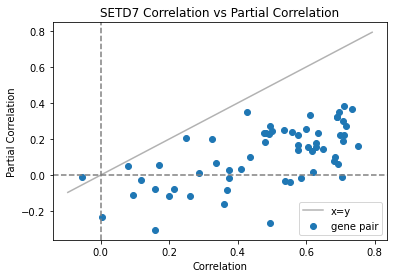

In [9]:
#Plot Correlation vs Partial correlation
np_corr = df_corr.loc['SETD7',df_pcorr.index.difference(['SETD7'])].values
np_pcorr = df_pcorr.loc['SETD7',df_pcorr.index.difference(['SETD7'])].values


plt.scatter(np_corr,np_pcorr,label='gene pair')
plt.plot([plt.xlim()[0],plt.xlim()[1]],[plt.xlim()[0],plt.xlim()[1]],c='gray',alpha=.6,label='x=y')
plt.axvline(0,linestyle='--',c='gray',)
plt.axhline(0,linestyle='--',c='gray')
plt.xlabel('Correlation')
plt.ylabel('Partial Correlation')
plt.legend()
plt.title('SETD7 Correlation vs Partial Correlation')